<a href="https://colab.research.google.com/github/laym0ura/projetos_ciencia_de_dados/blob/main/CLASSIFICA%C3%87%C3%83O_DE_ROUPAS_COM_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTANDO AS BIBLIOTECAS NECESSÁRIAS

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from google.colab import drive
from tensorflow.keras import layers, models

#CARREGANDO OS DADOS

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#lendo os dados
roupas_treino = pd.read_csv('/content/drive/My Drive/fashion-mnist-train.csv', sep = ',')
roupas_teste = pd.read_csv('/content/drive/My Drive/fashion-mnist-test.csv', sep = ',')

#VISUALIZAÇÃO DOS DADOS

In [5]:
#lendo as 5 primeiras linhas dos dados de treino
roupas_treino.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#lendo as 5 primeiras linhas dos dados de teste
roupas_teste.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


A coluna Label representa a categoria que o tipo de vestimenta se enquadra, são elas:

0 => T-shirt/top 

1 => Trouser 

2 => Pullover 

3 => Dress 

4 => Coat 

5 => Sandal 

6 => Shirt 

7 => Sneaker 

8 => Bag

9 => Ankle boot

Cada linha é uma imagem e as colunas representam as cores de cada pixel dessa imagem, que estão enquadradas numa escala que varia de 0 a 255.  Sendo 0 a cor preta e 255 a cor branca, ou seja, as imagens estão numa escala de cinza.

## TRANSFORMANDO OS DADOS

Para o treinamento da Rede Neural, vamos passar os dados para o tipo Array. Além disso, tranformaremos os dados que estão no tipo INT para o tipo FLOAT, para fazermos a normalização mais adiante.

In [6]:
treino = np.array(roupas_treino, dtype = 'float32')
teste = np.array(roupas_teste, dtype='float32')

In [ ]:
treino

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
treino.shape

(60000, 785)

##VISUALIZANDO AS IMAGENS

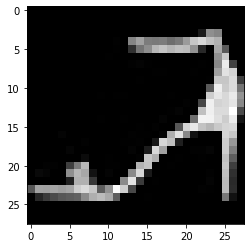

In [7]:
#vamos sortear um numero aleatorio entre 1 e 60000
i = random.randint(1, 60000)
#visualizar a imagem aleatoriamente (pegando uma linha aleatória, a partir da segunda coluna)
#o reshape será em 28x28, pois é a dimensão das imagens (podemos perceber que são 784 pixels, o que significa uma dimensão de 28x28)
plt.imshow(treino[i,1:].reshape((28,28)), cmap='gray');

In [ ]:
#visualizar a que classe a imagem pertence
label = treino[i,0]
label

2.0

##VISUALIZANDO AS IMAGENS EM GRID

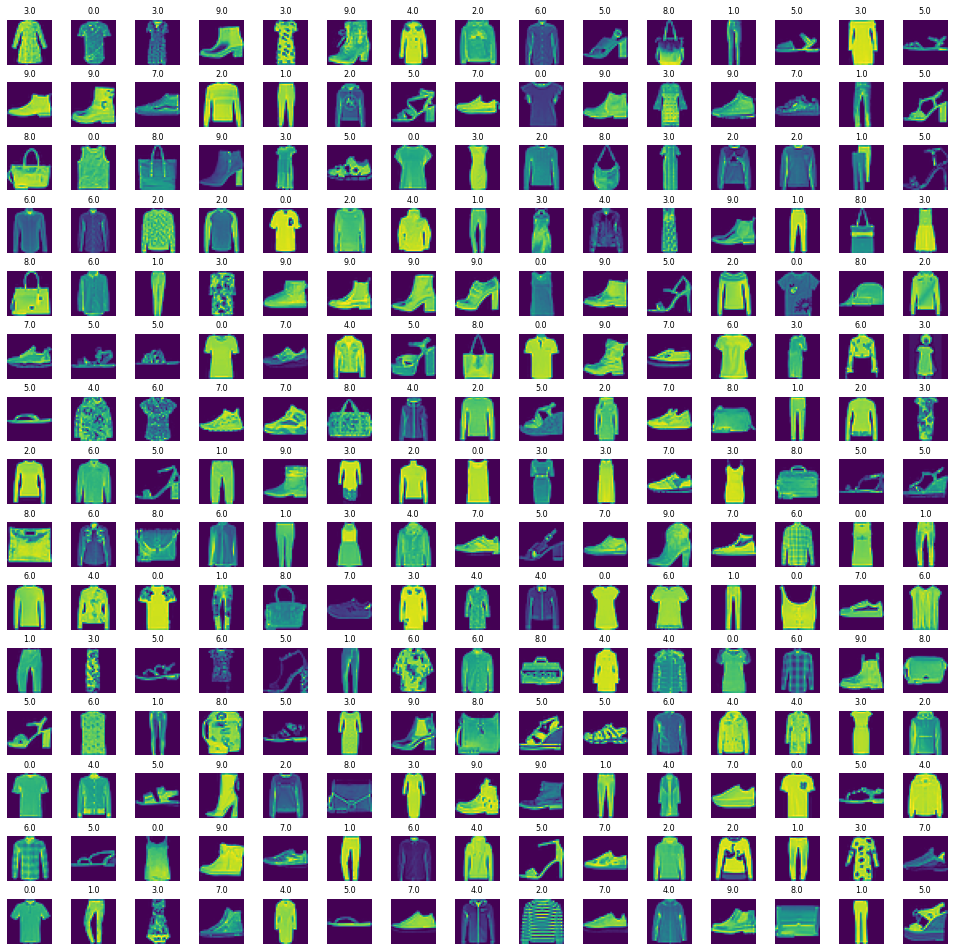

In [8]:
#para aparecer 15 linhas e 15 colunas com as imagens
w_grid = 15
l_grid = 15
#criando estruturas com subgraficos
fig, axes = plt.subplots(l_grid, w_grid, figsize = (17,17))
#funcao que transforma os eixos que estão em formato de matriz para o formato de vetor
axes = axes.ravel()
#quantidade de dados
n_treino = len(treino)


#criando um laço que vai de 0 até 225, que é a quantidade de subgraficos
for i in np.arange(0, w_grid * l_grid):
  #variavel que representa o índice de cada imagem
  index = np.random.randint(0, n_treino)
  #plotando a imagem, pegando o indice e seus pixels correspondentes, depois dimensionando para 28x28 pixels 
  axes[i].imshow(treino[index,1:].reshape((28,28)))
  #como título, colocamos a classe da imagem
  axes[i].set_title(treino[index, 0], fontsize = 8)
  #retira os eixos
  axes[i].axis('off')
 #plota as imagens com um espacamento de 0.4 entre elas 
plt.subplots_adjust(hspace = 0.4) 


#TRATAMENTO DA BASE DE DADOS

## NORMALIZAÇÃO DOS DADOS 

Para o processamento da rede neural ocorrer mais rapidamente, vamos normalizar os valores dos pixels. Como dito anteriormente, esses valores vão de 0 até 255. Após a normalização, esses valores irão ficar entre 0 e 1.

In [9]:
#pegando todas as linhas dos dados de treino, a partir da segunda coluna, e dividindo por 255, que é o valor máximo
x_train = treino[:,1:] / 255
#pegando somente a primeira coluna, que representa as classes das imagens
y_train = treino[:, 0]

In [10]:
#realizando o mesmo processo para os dados de teste
x_test = teste[:,1:] / 255
y_test = teste[:,0]

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
y_train.shape

(60000,)

In [ ]:
#verificando se a normalização deu certo, ou seja, se os ´pixels estão numa escala de 0 a 1
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## PASSANDO A IMAGEM PARA O FORMATO DE BATCH 

Para maiores explicações: https://stackoverflow.com/questions/41175401/what-is-a-batch-in-tensorflow

In [ ]:
x_train.shape[0]

60000

In [11]:
x_train = x_train.reshape(x_train.shape[0], *(28,28, 1))
x_test = x_test.reshape(x_test.shape[0], *(28,28, 1))

## CONSTRUÇÃO E TREINAMENTO DO MODELO

In [12]:
#criando uma cnn com modelo sequencial
cnn = models.Sequential()

#primeira camada de convolução
#parâmetro layers.conv2D = ((n de filtros), (tamanho do filtro (feature detector))) 
#função de ativação: função relu
#input shape: tamanho da imagem
cnn.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)))

#camada de maxpooling 
#reduzindo ainda mais a dimensionalidade
cnn.add(layers.MaxPooling2D(2,2))

#adicionando mais uma camada de convolução e de maxpooling
cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(layers.MaxPooling2D(2,2))

#adicionando mais uma camada de convolução e de maxpooling
cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(layers.MaxPooling2D(2,2))

#adicionando a camada de flatening
cnn.add(layers.Flatten())

#criando a rede neural densa
cnn.add(layers.Dense(64, activation = 'relu'))

#adicionando mais uma camada densa com 10 neuronios, pois temos 10 classes 
cnn.add(layers.Dense(10, activation = 'softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [13]:
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam',
            metrics = ['accuracy'])

In [15]:
# batch_size = 512 significa que o ajuste dos pesos sera feita de 512 em 512 registros
epochs = 25
history = cnn.fit(x_train, y_train, batch_size = 512, epochs = epochs)

Epoch 1/25
118/118 [==============================] - 47s 401ms/step - loss: 0.2462 - accuracy: 0.9111
Epoch 2/25
118/118 [==============================] - 47s 401ms/step - loss: 0.2445 - accuracy: 0.9111
Epoch 3/25
118/118 [==============================] - 47s 401ms/step - loss: 0.2395 - accuracy: 0.9122
Epoch 4/25
118/118 [==============================] - 47s 402ms/step - loss: 0.2336 - accuracy: 0.9146
Epoch 5/25
118/118 [==============================] - 49s 419ms/step - loss: 0.2295 - accuracy: 0.9164
Epoch 6/25
118/118 [==============================] - 47s 402ms/step - loss: 0.2267 - accuracy: 0.9170
Epoch 7/25
118/118 [==============================] - 48s 403ms/step - loss: 0.2180 - accuracy: 0.9212
Epoch 8/25
118/118 [==============================] - 47s 402ms/step - loss: 0.2174 - accuracy: 0.9200
Epoch 9/25
118/118 [==============================] - 47s 402ms/step - loss: 0.2136 - accuracy: 0.9219
Epoch 10/25
118/118 [==============================] - 47s 402ms/step - l

#AVALIAÇÃO DO MODELO

In [16]:
#para ver a perda e a acurácia do modelo
evaluation = cnn.evaluate(x_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.3024 - accuracy: 0.8992


In [17]:
evaluation

[0.3023742437362671, 0.8992000222206116]

O modelo possui uma acurácia de cerca de 0.9 e um loss value de 0.3.

In [18]:
predict_x = cnn.predict(x_test)
predicted_classes = np.argmax(predict_x, axis =1)

313/313 [==============================] - 7s 20ms/step


In [19]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 3])

In [20]:
y_test

array([0., 1., 2., ..., 8., 8., 1.], dtype=float32)

Visualização de classes preditas e classes verdadeiras:

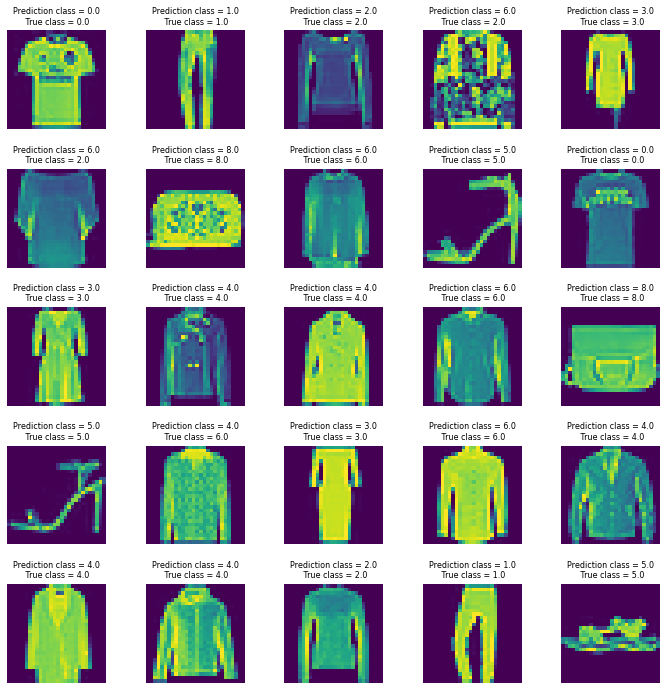

In [27]:
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, W_grid * L_grid):
  axes[i].imshow(x_test[i].reshape((28,28)))
  axes[i].set_title("Prediction class = {:0.1f}\n True class = {:0.1f}".format(predicted_classes[i], y_test[i]), fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

##MATRIZ DE CONFUSÃO

Uma matriz de confusão é uma tabela que indica os erros e acertos do seu modelo, comparando com o resultado esperado (ou etiquetas/labels). A imagem abaixo demonstra um exemplo de uma matriz de confusão:

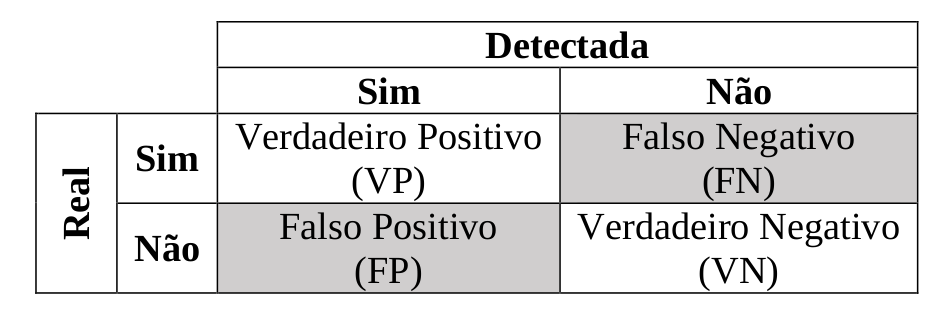

**Verdadeiros Positivos:** classificação correta da classe Positivo;

**Falsos Negativos (Erro Tipo II):** erro em que o modelo previu a classe Negativo quando o valor real era classe Positivo;

**Falsos Positivos (Erro Tipo I):** erro em que o modelo previu a classe Positivo quando o valor real era classe Negativo;

**Verdadeiros Negativos:** classificação correta da classe Negativo.

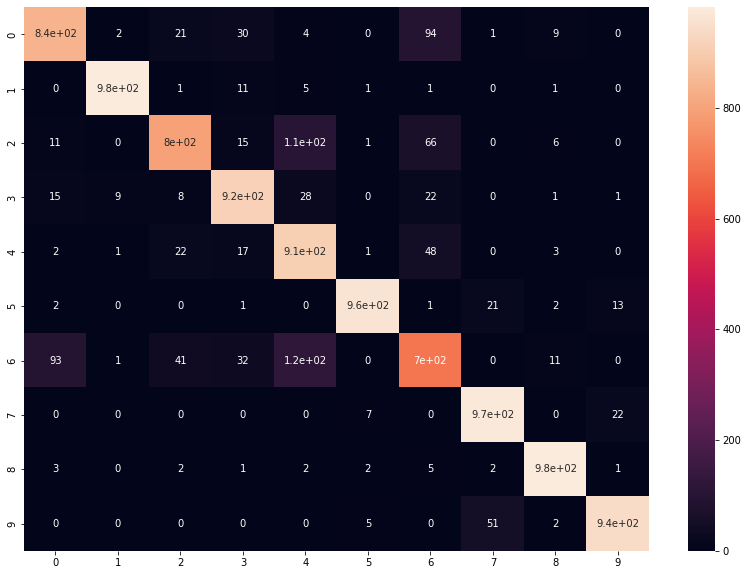

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot = True)

A partir da matriz de confusão, podemos perceber que algumas classes foram preditas incorretamente. A classe 4 (coat), por exemplo, foi muitas vezes predita como classe 2 (pullover) ou 6 (shirt). Há, entretanto, grande semelhança entre essas classes, o que pode ter sido a causa da previsão errada.

##ACURÁCIA, PRECISION, RECALL E F1-SCORE

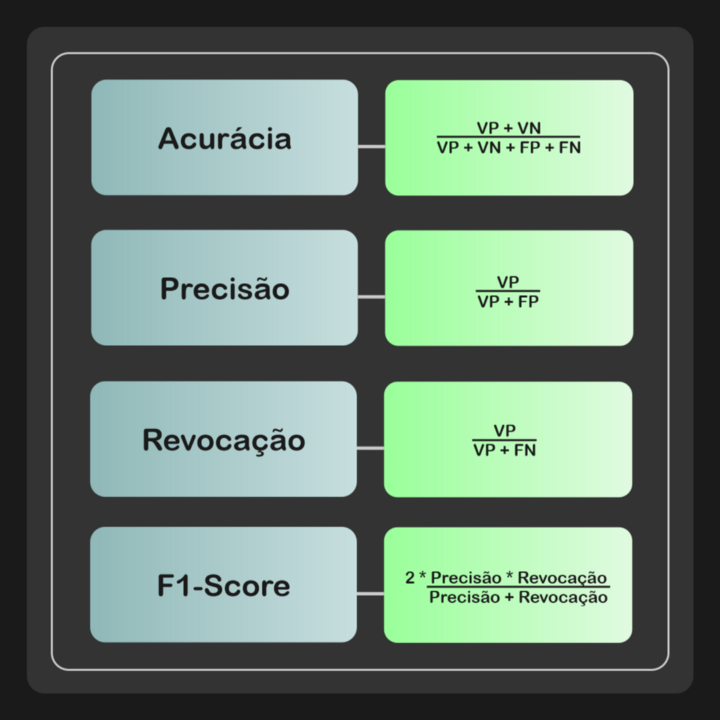

**Acurácia:** indica uma performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente;

**Precisão:** dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas;

**Recall/Revocação/Sensibilidade:** dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas;

**F1-Score:** média harmônica entre precisão e recall.

In [29]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ['Class {}'. format(i) for i in range(num_classes)]

In [30]:
print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.87      0.84      0.85      1000
     Class 1       0.99      0.98      0.98      1000
     Class 2       0.89      0.80      0.84      1000
     Class 3       0.90      0.92      0.91      1000
     Class 4       0.77      0.91      0.83      1000
     Class 5       0.98      0.96      0.97      1000
     Class 6       0.75      0.70      0.72      1000
     Class 7       0.93      0.97      0.95      1000
     Class 8       0.97      0.98      0.97      1000
     Class 9       0.96      0.94      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

